In [1]:
import pandas as pd
data = pd.read_csv(r'E:\data set\Task-13\hospital.csv')
data.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


Handling Missing Values 

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

for column in data.columns:
    if data[column].dtype == 'object':
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:
        data[column].fillna(data[column].median(), inplace=True)
        
        
categorical_features = ['age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'change', 'diabetes_med']
categorical_transformer = OneHotEncoder(drop='first')

numerical_features = ['time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency']
numerical_transformer = StandardScaler()

Preprocessing Data


In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X = data.drop('readmitted', axis=1)
y = data['readmitted'].apply(lambda x: 1 if x == 'yes' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Pipeline

In [12]:
from sklearn.pipeline import Pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(random_state=42))])

Train the model

In [13]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['time_in_hospital',
                                                   'n_lab_procedures',
                                                   'n_procedures',
                                                   'n_medications',
                                                   'n_outpatient',
                                                   'n_inpatient',
                                                   'n_emergency']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['age', 'medical_specialty',
                                                   'diag_1', 'diag_2', 'diag_3',
                                                   'change',
                                                   'diabetes_med'])])),
                ('classifier', LogisticRegression(random_state=42))])

Calculate precision, recall, and F1-score

In [14]:
y_pred = model.predict(X_test)


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Precision: 0.6353
Recall: 0.4081
F1-Score: 0.4970

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.79      0.68      3974
           1       0.64      0.41      0.50      3526

    accuracy                           0.61      7500
   macro avg       0.62      0.60      0.59      7500
weighted avg       0.62      0.61      0.60      7500



C:\Users\Syed\AppData\Local\Temp\ipykernel_8948\1229622226.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis')


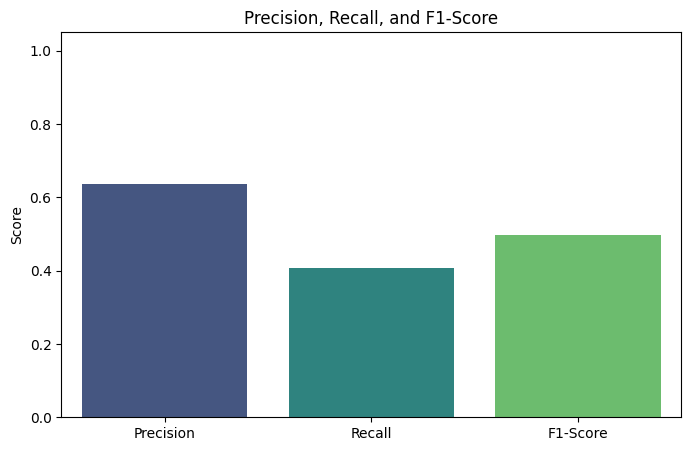

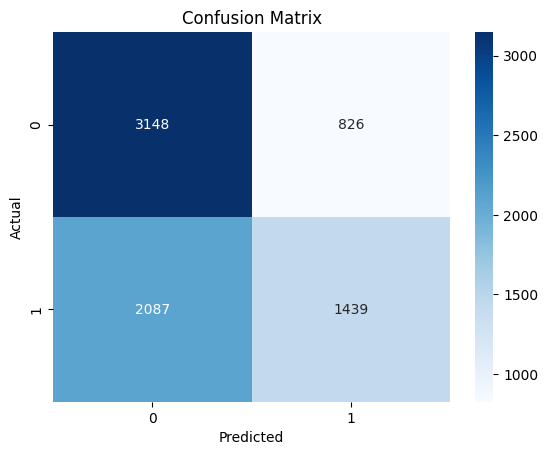

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# 1. Bar Plot of Precision, Recall, and F1-Score
metrics = ['Precision', 'Recall', 'F1-Score']
values = [precision, recall, f1]

plt.figure(figsize=(8, 5))
sns.barplot(x=metrics, y=values, palette='viridis')
plt.ylim(0, 1.05)
plt.title('Precision, Recall, and F1-Score')
plt.ylabel('Score')
plt.show()

# 2. Confusion Matrix for additional visualization
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
